## Data 335 &mdash; Winter 2025 &mdash; Assignment 1

#### Due: 2025.02.03 at 23:59

#### Instructions

- Save a copy of this file, changing its name to include your name and student ID as indicated.

- Solve the problems, adding code and markdown cells as needed.

- Your code should be runnable! Before submitting your work, *Restart* your environment and *Run All* to verify that everything works.

- Please submit a `.pdf` export of your notebook (with the same name stem) to the D2L dropbox in addition to the `.ipynb` file. If you're using VS Code, click the three dots (button bar, top right) and select *Export*.

#### Grading
- All problems have equal weight.

- Half-credit will be awarded for substantial progress towards a solution.

In [473]:
import numpy as np
import pandas as pd

### 1. The advantage of cross-validation

In this problem, we'll identify an advantage of the $5$-fold cross-validation estimate of predictive error over a simple average of test error quantities over 5 random 80%/20% train/test splits.

**To do:** Write two functions `f` and `g`.
They should each take, as input,
- a feature matrix `X` with `n` rows and a target vector `y` of length `n`;
- an integer `n_repeats` (default value `1000`);
- an integer `n_splits` (default value `5`);
- a random seed (default value `None`)

and produces, as output,

- a matrix of shape `(n_repeats, n_splits)`.

Each row of the ouput of `f` should consist of the `n_splits` test error quantities for a linear regression model fit to/predicted on the `n_splits` training/testing splits of `X` obtained through the cross-validation procedure. (Use `sklearn.model_selection.KFold`.)

Each row of the ouput of `g` should consist of the `n_splits` test error quantities for a linear regression model fit to/predicted on `n_splits` independent training/testing splits of `X`. (Use `sklearn.model_selection.train_test_split`.)

Applications of `f` with the same inputs should produce the same outputs. Randomizaton of splits should be determined by the specified seed. Same for `g`.

The means of the rows of the outputs of `f` and of `g` are estimates of the expected predictive error of a linear regression model fit to a random subset of the data of size `0.8*n`.

**To do:**

- Run your functions `f` on `g` on the `auto_preprocessed` dataset.

- Compute and compare the means and standard deviations of these row-means, and plot their histograms. What do the results suggest about the cross-validation splits versus random train/test splits? Can you explain your observations?

- How large do you need to set `n_splits` in `g` to match the efficiency (i.e., the standard deviation) of the 5-fold cross-validation estimator?

In [ ]:
def f(X, y, *, n_repeats=1000, n_splits=5, seed=None):
    rng = np.random.default_rng(seed)
    kfold_mses = np.zeros((n_repeats, 5))

    # Your stuff here.

    return kfold_mses


def g(X, y, *, n_repeats=1000, n_splits=5, seed=None):
    rng = np.random.default_rng(seed)
    train_test_split_mses = np.zeros((n_repeats, 5))

    # Your stuff here.

    return train_test_split_mses

In [460]:
X = pd.read_csv("../data/auto_preprocessed.csv")
y = X.pop("mpg")

### 2. Bigger models: Worth it?

**To do:** Produce two feature-engineered versions, `X0` and `X1`, of the feature matrix `X` for the `data/auto_preprocessed.csv` dataset.

`X0` should include:
- all features in `X`, and
- the squares of all the non-binary features of `X`. (Why exclude the squares of the binary features?) The binary features are the origin-indicators, `is_european` and `is_japanese`.

`X1` should include:
- `horsepower`, `weight`, `acceleration`, `year`, `is_european`, `is_japanese`; and
- `horsepower**2`, `weight**2`, `acceleration**2`, `year**2`

(`X1` removes all features involving `cylinders` or `displacement` from `X0`.)

**To do:** Use 5-fold cross-validation, repeated 1000 times, to estimate the predictive errors of linear regression models fit to `(X0, y)` and `(X1, y)`. Which is better?

**To do:** Use an *F*-test to compare the two models. Precisely state the null-hypothesis of the test.

### 3. "Forward" variable selection 

We continue working with the `data/auto_preprocessed.csv` dataset

Let `X0` the the submatrix of the feature matrix `X` containing only the binary origin columns `is_european` and `is_japanese`.

**(a)** Which numerical (non-binary) feature, when added to `X0`, yields the largest decrease in predictive error, as estimated by 5-fold cross-validation, repeated 100 times? 

**(b)** Let `X1` denote the feature matrix obtained by adding the feature identified in (a). Which numerical (non-binary) feature, when added to `X1`, yields the largest decrease in predictive error, as estimated by 5-fold cross-validation, repeated 100 times?

...

**(f)** Let `X5` denote the feature matrix obtained by adding the feature identified in (e). Which numerical (non-binary) feature, when added to `X5`, yields the largest decrease in predictive error, as estimated by 5-fold cross-validation, repeated 100 times?


In [472]:
X = pd.read_csv("../data/auto_preprocessed.csv")
y = X.pop("mpg")

X0 = X[["is_european", "is_japanese"]].copy()

### 4. "Backward" variable selection 

We continue working with the `data/auto_preprocessed.csv` dataset

**(a)** Which numerical (non-binary) feature, when removed from `X`, yields the smallest increase in predictive error, as estimated by 5-fold cross-validation, repeated 100 times? 

**(b)** Let `X1` denote the feature matrix obtained by removing the feature identified in (a). Which numerical (non-binary) feature, when removed from `X1`, yields the smallest increase in predictive error, as estimated by 5-fold cross-validation, repeated 100 times?

...

**(f)** Let `X5` denote the feature matrix obtained by removing the feature identified in (e). Which numerical (non-binary) feature, when removed from `X5`, yields the smallest increase in predictive error, as estimated by 5-fold cross-validation, repeated 100 times?

**(g)** Both this exercise and exercise 3 rank features by importance. How do these rankings compare?

In [ ]:
X = pd.read_csv("../data/auto_preprocessed.csv")
y = X.pop("mpg")

### 5. Lab 3, Exercise 2

Here's a fake dataset describing the relationship between cholesterol level (a heart disease risk factor), age (ordinal, four categories, ages 10-30, 30-50, 50-70, and 70-90), and weekly hours of exercise.

In [ ]:
def make_data():
    n = 100
    np.random.seed(0)
    age = np.random.choice([0, 1, 2, 3], size=n)
    exercise = 2 * age + 3 * np.random.normal(size=n) + 6
    colesterol = 200 + 30 * age - 5 * exercise + 10 * np.random.normal(size=n)
    df = pd.DataFrame({"age": age, "exercise": exercise, "colesterol": colesterol})
    return df


data = make_data()
data.head()

- Plot the (simple) linear regression of `cholesterol` on `exercise`, overlaid on a scatterplot of the data. Do the results surprise you?

- Fit a multivariate linear regression of `cholesterol` onto `exercise` and `age`. Plot the regression lines corresponding to each of the age groups, overlaid with a scatterplot of the data. Use a different color for each age group. Comment.

This exercise demonstrates a phenomenon known as *Simpson's Paradox*. The inspiration for this exercise comes from &sect;1.2 of **Causal Inference in Statistics** by Pearl, Gylmour, and Jewel.

6. Lab 4, Exercise 1

### 1)

In this exercise, we use data about gas mileage, horsepower, and other information for 392 vehicles. See [here](https://islp.readthedocs.io/en/latest/datasets/Auto.html) for details. Use the file `data/auto.csv`.

##### a)
Without looking at the data, guess the sign of the slope of the regression of `mpg` onto `acceleration` and `mpg` onto `year`. Then fit two simple linear regression models and compare the regression slopes with your guesses. Discuss.

##### b)
Compute the group means `mpg` grouped by `origin`. Fit a regression of `mpg` onto the categorical predictor `origin` *without intercept* term. What do you observe about the coefficient estimates. Can you explain this? Now fit a regression of `mpg` onto `origin` *with intercept*. Show how the coefficients of this regression fit can be expressed in terms of the intercept-free regression coefficients, and vice-versa.

##### c)
Let `X` be the matrix of dummy variables associated to `origin`:
```
X = pd.get_dummies(autos["origin"])
```
Find a number `a` and a vector `b` of shape `(3,)` such that `b.sum() == 0` and such that `a + X @ b` coincides with the predictions from the models fit in (b).

##### d)
Let `X` be as in (c) and let `n` be the vector of row counts associated to the three origins. Find a number `a` and a vector `b` of shape `(3,)` such that `np.sum(n*b) == 0` and such that `a + X @ b` coincides with the predictions from the models fit in (b). Observe that `a` equals the overall mean `auto["mpg"].mean()`. The entries of `b` are "treatments effects" associated to the origins.

##### e)
Fit the linear regression of all the quantitative features (i.e., all the features except for `origin` and `name`) and note which non-intercept coefficient estimates have *p*-values < 0.05. Repeat with all the quantitative features except for `weight`. Compare and discuss.

##### f)
Perform an *F*-test the null hypothesis that means of the `mpg` variable are equal across all three origins after adjusting for all the continuous covariates.



#### 1. (😖/🫤/😇)



Write a function that takes, as input
- a dataframe
- a target column name
- list of feature column names
- the `k` for `k`-fold cross-validation
- a number of 


In class, we saw that including the quadratic feature `weight**2` improved the predictive performance of the linear model fit to the `auto` dataset. In this exercise, we consider which other quadratic features might be 

In [15]:
auto = (
    pd.read_csv("../data/auto.csv", na_values=["?"], dtype={"origin": "category"})
    .drop(columns=["name"])
    .dropna()
    .reset_index(drop=True)
)
X = auto.copy()
y = X.pop("mpg")

## 1. Transformers and Pipelines: Guided Tour

Scikit-learn has great functionality for preprocessing and transforming data. The responsible classes are called *transformers*.

Guided by [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), write a function that takes, as input, a list of feature columns to drop, and returns a `ColumnTransformer` that accomplishes that task. We'll revisit `ColumnTransformer` more systematically later.

In [16]:
def make_dropper(columns=None):
    if columns is None:
        columns = []

    transformer = ColumnTransformer(
        # your code here
        ...,
        force_int_remainder_cols=False,  # an annoying warning gets raised if without this keyword parameter
    )
    transformer.set_output(transform="pandas")
    return transformer

In [17]:
# Solution


def make_dropper(columns=None):
    if columns is None:
        columns = []

    transformer = ColumnTransformer(
        [("drop", "drop", columns)],
        remainder="passthrough",
        verbose_feature_names_out=False,
        force_int_remainder_cols=False,
    )
    transformer.set_output(transform="pandas")
    return transformer

> Aside: Why set the default value of the keyword argument `columns` to `None` in the signature and then reassign it to `[]` in the implementation? Why not just have `columns=None` in the signature? See the paragraph starting "**Default parameter values are evaluated from left to right when the function definition is executed.**" in [&sect;8.7 of the Python Language Reference](https://docs.python.org/3/reference/compound_stmts.html#function-definitions).

Use `make_dropper` to instantiate a `ColumnTransformer` that drops the `cylinders` and `displacement`:

In [18]:
dropper = make_dropper(columns=["cylinders", "displacement"])
dropper

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('drop', 'drop',
                                 ['cylinders', 'displacement'])],
                  verbose_feature_names_out=False)

In [19]:
# Solution

[x for x in dir(dropper) if x[0] != "_" and x[-2] != "_" and x[-1] == "_"]

['named_transformers_']

Use the `fit` method to compute transformation parameters from the data it will be transforming:

In [20]:
dropper.fit(X)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('drop', 'drop',
                                 ['cylinders', 'displacement'])],
                  verbose_feature_names_out=False)

What effect did fitting the transformer have?

- Inspect the *remainder* dropdown in the notebook output.

  ***Your comments here.***

> Until it sees data, `dropper` has no way of knowing the names of the remainder columns to pass through. Thus, the remainder and the passthrough dropdowns are initially empty. Fitting the model identitfies these columns as `horsepower`,`weight`, `acceleration`, `year`, `origin``.

- Fitting a scikit-learn estimator or transformer adds fields suffixed with a single underscore `_` to the instance. (A single trailing underscore is the scikit-learn convention for an attribute that is computed/fit from data.) Which attributes did fitting `dropper` add?

  ***Your comments here.***

> Fitting `dropper` adds the attributes `feature_names_in_`, `n_features_in_`, `output_indices_`, `sparse_output_`, `transformers_` to the instance. The `named_transformers_` attribute was already present before fitting, but trying to access it would raise an `AttributeError`.

In [21]:
# Solution

[x for x in dir(dropper) if x[0] != "_" and x[-2] != "_" and x[-1] == "_"]

['feature_names_in_',
 'n_features_in_',
 'named_transformers_',
 'output_indices_',
 'sparse_output_',
 'transformers_']

Fitting a transformer doesn't actually transform anything. Do that using the `transform` method:

In [22]:
dropper.transform(X).head()

,horsepower,weight,acceleration,year,origin
0,130.0,3504,12.0,70,1
1,165.0,3693,11.5,70,1
2,150.0,3436,11.0,70,1
3,150.0,3433,12.0,70,1
4,140.0,3449,10.5,70,1


To fit a transformer to data and transform that data in one step, use the `fit_transform` method:

In [23]:
dropper = make_dropper(columns=["cylinders", "displacement"])
dropper.fit_transform(X).head()

,horsepower,weight,acceleration,year,origin
0,130.0,3504,12.0,70,1
1,165.0,3693,11.5,70,1
2,150.0,3436,11.0,70,1
3,150.0,3433,12.0,70,1
4,140.0,3449,10.5,70,1


Let's use transformers for more standard data preprocessing and transformation tasks.

### `StandardScaler`

The `StandardScaler` transformer *standardizes* columns by subtracts their means then dividing the result by their standard deviations.

Let's standardize the numerical (non-categorical) feature columns in the `auto` dataset:

In [24]:
dropper = make_dropper(columns=["origin"])
XX = dropper.fit_transform(X)

ss = StandardScaler()
XXX = ss.fit_transform(XX)

Replace the ellipsis `...` with the appropriate expressions to verify that the `ss` did what it was supposed to do:

In [25]:
# Check that the column means of XXX are 0.
assert np.allclose(..., 0)

# Check that the column standard deviations of XXX are 1.
assert np.allclose(..., 1)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [28]:
# Solution

# Check that the column means of XXX are 0.
assert np.allclose(XXX.mean(axis=0), 0)

# Check that the column standard deviations of XXX are 1.
assert np.allclose(XXX.std(axis=0), 1)

### `OneHotEncoder`

The `OneHotEncoder` transformer adds dummy variables to transform **all** columns (not just the categorical ones &mdash; see below) into binary indicators. Use the `drop` keyword argument to specify which category (if any) to treat as a reference and elide from the result.

Because the binary indicator columns have so many zero entries, scikit-learn opts, by default, to return the transformed data in an efficient sparse array encoding rather than as a dataframe. Pass `sparse_output=False` to disable this optimization (dataframes are nice). 

In [29]:
ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.set_output(transform="pandas")
ohe.fit_transform(X[["year", "origin"]]).head()

,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_2,origin_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### `FunctionTransformer`

Use `FunctionTransformer` to apply a function to each column. You can provide a function as the `feature_names_out` keyword argument to name the output columns appropriately.

In [92]:
dropper = make_dropper(columns=["origin"])
XX = dropper.fit_transform(X)


def feature_names_out(transformer, feature_names_in):
    return [f"{f}**2" for f in feature_names_in]


squaring_transformer = FunctionTransformer(
    np.square, feature_names_out=feature_names_out
)
XXX = squaring_transformer.fit_transform(XX)
XXX.head()

,cylinders**2,displacement**2,horsepower**2,weight**2,acceleration**2,year**2
0,64,94249.0,16900.0,12278016,144.00,4900
1,64,122500.0,27225.0,13638249,132.25,4900
2,64,101124.0,22500.0,11806096,121.00,4900
3,64,92416.0,22500.0,11785489,144.00,4900
4,64,91204.0,19600.0,11895601,110.25,4900


In [ ]:
# Solution


def feature_names_out(transformer, feature_names_in):
    return [f"{f}**2" for f in feature_names_in]


class NamedFunctionTransformer(FunctionTransformer):
    def __init__(self, func=None, inverse_func=None, **kwargs):
        if "feature_names_out" not in kwargs and func is not None:

            def feature_names_out(transformer, feature_names_in):
                return [f"{func.__name__}({f})" for f in feature_names_in]

            kwargs["feature_names_out"] = feature_names_out
        super().__init__(func, inverse_func, **kwargs)

In [ ]:
def make_function_transformer(
    func=None,
    inverse_func=None,
    *,
    validate=False,
    accept_sparse=False,
    check_inverse=True,
    feature_names_out=None,
    kw_args=None,
    inv_kw_args=None,
):
    if feature_names_out is None and func is not None:

        def _feature_names_out(transformer, feature_names_in):
            return [f"{func.__name__}({f})" for f in feature_names_in]

        feature_names_out = _feature_names_out

    return FunctionTransformer(
        func=func,
        inverse_func=inverse_func,
        validate=validate,
        accept_sparse=accept_sparse,
        check_inverse=check_inverse,
        feature_names_out=feature_names_out,
        kw_args=kw_args,
        inv_kw_args=inv_kw_args,
    )

In [135]:
s = NamedFunctionTransformer(np.square)
x = np.random.uniform(size=(3, 6))
xx = s.fit_transform(x)
assert np.allclose(xx, x**2)

x = pd.DataFrame({"x": np.random.normal(size=10), "y": np.random.normal(size=10)})
s = NamedFunctionTransformer(np.square)
xx = s.fit_transform(x)
assert np.allclose(x.to_numpy() ** 2, xx.to_numpy())

In [137]:
x = pd.DataFrame({"x": np.random.normal(size=10), "y": np.random.normal(size=10)})
s = NamedFunctionTransformer()
xx = s.fit_transform(x)
xx

,x,y
0,0.925949,-0.024873
1,1.616244,-1.143894
2,1.926561,0.704671
3,1.568516,-0.928266
4,-1.188183,0.039495
5,-0.337069,-1.957603
6,0.152196,-0.931492
7,-0.684832,1.351286
8,0.335317,-0.436752
9,2.208717,-2.367177


### `ColumnTransformer`

The built-in transformers `StandardScaler`, `OneHotEncoder`, and `FunctionTransformer` act on all columns.
To transform different columns in different ways (using different transformers), use `ColumnTransformer`. We already used `ColumnTransformer` above in the implementation of the `make_dropper` function.

Fill in the ellipsis `...` in the next code cell to make a column transformer that applies `StandardScaler` to numeric columns and `OneHotEncoder` to categorical ones. [The docs for `make_column_selector`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html) should come in handy.

In [31]:
scale_or_encode = ColumnTransformer(
    [
        (
            "scale_numeric",
            StandardScaler(),
            make_column_selector(...),  # your work here
        ),
        (
            "encode_categorical",
            OneHotEncoder(drop="first", sparse_output=False).set_output(
                transform="pandas"
            ),
            make_column_selector(...),  # your work here
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False,  # type: ignore
).set_output(transform="pandas")

In [32]:
# Solution

scale_or_encode = ColumnTransformer(
    [
        (
            "scale_numerical",
            StandardScaler(),
            make_column_selector(dtype_include=np.number),  # your work here
        ),
        (
            "encode_categorical",
            OneHotEncoder(drop="first", sparse_output=False).set_output(
                transform="pandas"
            ),
            make_column_selector(dtype_include="category"),  # your work here
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False,  # type: ignore
).set_output(transform="pandas")

scale_or_encode.fit_transform(X).head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin_2,origin_3
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0.0,0.0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0.0,0.0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0.0,0.0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0.0,0.0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0.0,0.0


In [ ]:
class SelectiveStandardScaler

#### Exercise

"Factor" `scale_or_encode` into two `ColumnTransformer`s, `scale_numerical` and `encode_categorical`, such that

- `scale_numerical` applies `StandardScaler` to each numerical column and passes nonnumerical columns through;

- `encode_categorical` applies `OneHotEncoder` to each categorical column and passes noncategorical columns through.

Does `scale_numerical` followed by `encode_categorical` give the same results as `encode_categorical` followed by `scale_numerical`, up to the ordering of the columns?

In [33]:
# Solution

scale_numerical = ColumnTransformer(
    [
        (
            "scale_numerical",
            StandardScaler(),
            make_column_selector(dtype_include=np.number),  # your work here
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False,  # type: ignore
).set_output(transform="pandas")

encode_categorical = ColumnTransformer(
    [
        (
            "encode_categorical",
            OneHotEncoder(drop="first", sparse_output=False).set_output(
                transform="pandas"
            ),
            make_column_selector(dtype_include="category"),  # your work here
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False,  # type: ignore
).set_output(transform="pandas")

# This does the right thing.
display(encode_categorical.fit_transform(scale_numerical.fit_transform(X)).head())

# This doesn't.
# The dummy columns replacing `origin` are numerical and, thus, are scaled by `scale_numerical`.
# This isn't what we want.
display(scale_numerical.fit_transform(encode_categorical.fit_transform(X)).head())

,origin_2,origin_3,cylinders,displacement,horsepower,weight,acceleration,year
0,0.0,0.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,0.0,0.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,0.0,0.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,0.0,0.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,0.0,0.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


,origin_2,origin_3,cylinders,displacement,horsepower,weight,acceleration,year
0,-0.458123,-0.50239,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-0.458123,-0.50239,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.458123,-0.50239,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.458123,-0.50239,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.458123,-0.50239,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


### `Pipeline`

Multiple transformers can be chained together into a *pipeline*, the result behaving as a single transformer:

In [34]:
dropper = make_dropper(["cylinders", "displacement"])
preprocessor = Pipeline(
    steps=[("dropper", dropper), ("scale_and_encode", scale_or_encode)],
)

display(preprocessor.fit_transform(X).head())
display(preprocessor)

,horsepower,weight,acceleration,year,origin_2,origin_3
0,0.664133,0.620540,-1.285258,-1.625315,0.0,0.0
1,1.574594,0.843334,-1.466724,-1.625315,0.0,0.0
2,1.184397,0.540382,-1.648189,-1.625315,0.0,0.0
3,1.184397,0.536845,-1.285258,-1.625315,0.0,0.0
4,0.924265,0.555706,-1.829655,-1.625315,0.0,0.0


Pipeline(steps=[('dropper',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['cylinders',
                                                   'displacement'])],
                                   verbose_feature_names_out=False)),
                ('scale_and_encode',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('scale_numerical',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x145c42ba0>),
                                                 ('encode_categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1469e8560>)],
                                   verbose_feature_names_out=False))])

### The identity transformer

You can use `ColumnTransformer` to make the *identity transformer*, the transformer that simply returns its input.

In [35]:
identity_transformer = ColumnTransformer(
    [], remainder="passthrough", verbose_feature_names_out=False
).set_output(
    transform="pandas",
)

assert all(identity_transformer.fit_transform(X) == X)

Why might you want this?

### `FeatureUnion`

`FeatureUnion` concatenates the outputs of a sequence of transformers. This can be used to append derived features to the dataset since appending is concatenating with the identity.

In [36]:
append_all_squares = FeatureUnion(
    [("identity", identity_transformer), ("square", squaring_transformer)],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

XXX = append_all_squares.fit_transform(XX)
XXX.head()

,cylinders,displacement,horsepower,weight,acceleration,year,cylinders_squared,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,year_squared
0,8,307.0,130.0,3504,12.0,70,64,94249.0,16900.0,12278016,144.00,4900
1,8,350.0,165.0,3693,11.5,70,64,122500.0,27225.0,13638249,132.25,4900
2,8,318.0,150.0,3436,11.0,70,64,101124.0,22500.0,11806096,121.00,4900
3,8,304.0,150.0,3433,12.0,70,64,92416.0,22500.0,11785489,144.00,4900
4,8,302.0,140.0,3449,10.5,70,64,91204.0,19600.0,11895601,110.25,4900


In [ ]:
# Solution

class AppendAllSquares

Make a pipeline `append_numerical_squares` with the following steps:

1. drop non-numerical columns
2. append squares of all columns (all numerical at this step in the pipeline)

Make a pipeline `encode_categoricals` with the the following steps:

Make a transformer `append_numeric_squares` that appends squares of all numerical columns while passing through the rest. *Hint: Wrap `append_all_squares` in a `ColumnTransformer`.*

In [ ]:
append_numeric_squares = ...

In [ ]:
# Solution

class AppendNumericSquares(ColumnTransformer):
    

append_numeric_squares = ColumnTransformer(
    [
        (
            "append_all_squares",
            append_all_squares,
            make_column_selector(dtype_include=np.number),
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False,  # type: ignore
).set_output(transform="pandas")

In [38]:
append_numeric_squares.fit_transform(X).head()

,cylinders,displacement,horsepower,weight,acceleration,year,cylinders_squared,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,year_squared,origin
0,8,307.0,130.0,3504,12.0,70,64,94249.0,16900.0,12278016,144.00,4900,1
1,8,350.0,165.0,3693,11.5,70,64,122500.0,27225.0,13638249,132.25,4900,1
2,8,318.0,150.0,3436,11.0,70,64,101124.0,22500.0,11806096,121.00,4900,1
3,8,304.0,150.0,3433,12.0,70,64,92416.0,22500.0,11785489,144.00,4900,1
4,8,302.0,140.0,3449,10.5,70,64,91204.0,19600.0,11895601,110.25,4900,1


Make two preprocessor pipe

### Pipelines with models

In addition to transformers, estimators like `LinearRegression()` can be steps in pipelines (usually the last step).

In [39]:
model = Pipeline(
    steps=[("preprocessor", preprocessor), ("linear_regression", LinearRegression())]
)
model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('dropper',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('drop',
                                                                   'drop',
                                                                   ['cylinders',
                                                                    'displacement'])],
                                                    verbose_feature_names_out=False)),
                                 ('scale_and_encode',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('scale_numerical',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x145c42ba0>),
                                                                  ('encode_categorical',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1469e8560>)],
                                                    verbose_feature_names_out=False))])),
                ('linear_regression', LinearRegression())])

Make two preprocessor transformers or pipelines, `p` and `q`:

- `p` should append squares of all numerical features, and encode categorical features.
- `q` should drop the `cylinders` and `displacement` and pass the result to `p`.

Extend `p` and `q` to modelling pipelines `P` and `Q` by passing their results to `LinearRegression` models.



In [40]:
p = ...
q = ...

P = Pipeline(steps=[("p preprocessor", p), ("linear_regression", LinearRegression())])
Q = Pipeline(steps=[("q preprocessor", q), ("linear_regression", LinearRegression())])

In [ ]:
# Solution

p = Pipeline(
    steps=[
        ("append_numeric_squares", append_numeric_squares),
        ("encode_categorical", encode_categorical),
    ]
)
display(p.fit_transform(X).head())

dropper = make_dropper(columns=["cylinders", "displacement"])
q = Pipeline(steps=[("dropper", dropper), ("p", p)])
display(q.fit_transform(X).head())

P = Pipeline(
    steps=[
        ("append_numeric_squares", append_numeric_squares),
        ("encode_categorical", encode_categorical),
        ("linear_regression", LinearRegression()),
    ]
)
Q = Pipeline(
    steps=[
        ("dropper", dropper),
        ("append_numeric_squares", append_numeric_squares),
        ("encode_categorical", encode_categorical),
        ("linear_regression", LinearRegression()),
    ]
)

,origin_2,origin_3,cylinders,displacement,horsepower,weight,acceleration,year,cylinders_squared,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,year_squared
0,0.0,0.0,8,307.0,130.0,3504,12.0,70,64,94249.0,16900.0,12278016,144.00,4900
1,0.0,0.0,8,350.0,165.0,3693,11.5,70,64,122500.0,27225.0,13638249,132.25,4900
2,0.0,0.0,8,318.0,150.0,3436,11.0,70,64,101124.0,22500.0,11806096,121.00,4900
3,0.0,0.0,8,304.0,150.0,3433,12.0,70,64,92416.0,22500.0,11785489,144.00,4900
4,0.0,0.0,8,302.0,140.0,3449,10.5,70,64,91204.0,19600.0,11895601,110.25,4900


,origin_2,origin_3,horsepower,weight,acceleration,year,horsepower_squared,weight_squared,acceleration_squared,year_squared
0,0.0,0.0,130.0,3504,12.0,70,16900.0,12278016,144.00,4900
1,0.0,0.0,165.0,3693,11.5,70,27225.0,13638249,132.25,4900
2,0.0,0.0,150.0,3436,11.0,70,22500.0,11806096,121.00,4900
3,0.0,0.0,150.0,3433,12.0,70,22500.0,11785489,144.00,4900
4,0.0,0.0,140.0,3449,10.5,70,19600.0,11895601,110.25,4900


#### Exercise

Estimate the predictive error of `P` and `Q` on the `auto` dataset using 5-fold cross-validation, averaged over 100 repetitions. Compare and comment.

In [42]:
# Solution

from sklearn.model_selection import RepeatedKFold

n_repeats = 100
rkf = RepeatedKFold(n_repeats=n_repeats, random_state=42)

P_errs = np.zeros(5 * n_repeats)
Q_errs = np.zeros(5 * n_repeats)

for i, (train, test) in enumerate(rkf.split(X)):
    P.fit(X.loc[train], y.loc[train])
    P_errs[i] = mean_squared_error(y.loc[test], P.predict(X.loc[test]))
    Q.fit(X.loc[train], y.loc[train])
    Q_errs[i] = mean_squared_error(y.loc[test], Q.predict(X.loc[test]))

print(P_errs.mean(), Q_errs.mean())

8.06455275771391 7.889303022412196


Even though it uses fewer features, model `Q` seems to better predictive performance. Inclusion of the features `cylinders`, `displacement`, `cylinders**2`, and displacement**2` may cause the more complex to overfit the training data.

What does the *F*-test tell you about model `P` versus model `Q`?

***Your comments here.***

In [ ]:
import scipy.stats as stats


class FTest:
    def __init__(
        self,
        full_model: LinearRegression | Pipeline,
        reduced_model: LinearRegression | Pipeline,
    ):

        if isinstance(full_model, Pipeline):
            full_head = full_model[-1]
            if not isinstance(full_head, LinearRegression):
                raise Exception(
                    "When a model is a Pipeline instance, its final step must be a LinearRegression instance."
                )
        else:
            full_head = full_model

        if isinstance(reduced_model, Pipeline):
            reduced_head = reduced_model[-1]
            if not isinstance(reduced_head, LinearRegression):
                raise Exception(
                    "When a model is a Pipeline instance, its final step must be a LinearRegression instance."
                )
        else:
            reduced_head = reduced_model

        if reduced_head.fit_intercept and not full_head.fit_intercept:  # type: ignore
            raise Exception(
                "Models are not nested. The reduced model is fit with intercept but the full one isn't."
            )

        self.full_model = full_model
        self.reduced_model = reduced_model
        self.full_head = full_head
        self.reduced_head = reduced_head

    def fit(self, X, y):
        full_model = self.full_model
        reduced_model = self.reduced_model
        full_head = self.full_head
        reduced_head = self.reduced_head

        full_model.fit(X, y)
        full_ss = np.sum((y - full_model.predict(X)) ** 2)

        reduced_model.fit(X, y)
        reduced_ss = np.sum((y - reduced_model.predict(X)) ** 2)
        print(X.columns)

        extra_features = [
            x
            for x in reduced_head.feature_names_in_
            if x not in full_head.feature_names_in_
        ]
        if len(extra_features) > 0:
            raise Exception(
                f"Models are not nested: feature {extra_features[0]} is in the reduced model but not in the full model."
            )

        n = len(X)

        # degrees of freedom
        full_df = n - len(full_head.feature_names_in_) - full_head.fit_intercept  # type: ignore
        reduced_df = n - len(reduced_head.feature_names_in_) - reduced_head.fit_intercept  # type: ignore

        # # residual sums of squares
        # full_ss = np.sum((y - full_model.predict(X)) ** 2)
        # reduced_ss = np.sum((y - reduced_model.predict(X)) ** 2)

        num = (reduced_ss - full_ss) / (reduced_df - full_df)
        denom = full_ss / full_df
        fstat = num / denom
        pval = 1 - stats.f(reduced_df - full_df, full_df).cdf(fstat)

        self.full_df_ = full_df
        self.reduced_df_ = reduced_df
        self.df_ = (reduced_df - full_df, full_df)
        self.full_ss_ = full_ss
        self.reduced_ss_ = reduced_ss
        self.fstat_ = fstat
        self.pval_ = pval

In [88]:
ftest = FTest(P, Q)
ftest.fit(X, y)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- cylinders
- cylinders_squared
- displacement
- displacement_squared


In [91]:
full_model = P
reduced_model = Q
full_model.fit(X, y)
reduced_model.fit(X, y)
full_ss = np.sum((y - full_model.predict(X)) ** 2)
# reduced_ss = np.sum((y - reduced_model.predict(X)) ** 2)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- cylinders
- cylinders_squared
- displacement
- displacement_squared


### Feature importance from sizes of coefficients in feature-scaled regression

Best subsets of features for models with each number of features

In [51]:
from sklearn.pipeline import make_pipeline

PP = make_pipeline(p, LinearRegression())
P.transform_input

In [58]:
P[-1].feature_names_in_

array(['origin_2', 'origin_3', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'cylinders_squared',
       'displacement_squared', 'horsepower_squared', 'weight_squared',
       'acceleration_squared', 'year_squared'], dtype=object)

In [55]:
type(PP[-1])

sklearn.linear_model._base.LinearRegression

In [56]:
type(PP.steps[-1])

tuple

#### CV vs Naïve

In [ ]:
def make_data_maker(p=2, sigma=1.0, seed=None):
    rng = np.random.default_rng(seed)
    beta = rng.normal(size=p)

    def make_data(n: int):
        X = rng.uniform(size=(n, p))
        X[:, 0] = 1
        x = X[:, 1:]
        y = X @ beta + sigma * rng.normal(size=n)
        return x, y

    return make_data, beta

In [295]:
p = 10
sigma = 1
n = 24
rng = np.random.default_rng(0)
beta = rng.normal(size=p)
X = rng.uniform(size=(n, p))
y = X @ beta + sigma * rng.normal(size=n)

In [ ]:
from sklearn.model_selection import RepeatedKFold

n_splits = 2
n_repeats = 40000
n_test = n_splits * n_repeats

cv_test_mses = np.zeros(n_test)

model = LinearRegression(fit_intercept=False)

train_sizes = set()
test_sizes = set()
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
for i, (train, test) in enumerate(rkf.split(X)):
    train_sizes.add(len(train))
    test_sizes.add(len(test))
    model.fit(X[train], y[train])
    cv_test_mses[i] = mean_squared_error(y[test], model.predict(X[test]))

print(train_sizes, test_sizes)
assert train_sizes == {len(train)}
assert test_sizes == {len(test)}

naive_test_mses = np.zeros(n_test)
for i in range(n_test):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=len(test))
    model.fit(X_train, y_train)
    naive_test_mses[i] = mean_squared_error(y_test, model.predict(X_test))

{12} {12}


In [309]:
print(cv_test_mses.mean(), naive_test_mses.mean())
print(cv_test_mses.std(), naive_test_mses.std())

8.276364033047676 8.588031394205785
37.482040614607634 37.1570652933386


8.318013469771355 8.352205000330313
29.617705419867065 43.511000185678355

In [ ]:
df = pd.read_csv("../data/auto.csv", na_values=["?"]).dropna().reset_index()
assert len(df) == 392
assert set(df.iloc[390:]["origin"]) == {1}
df = df.iloc[:390]  # make length a multiple of 5
X = df.drop(columns=["name", "origin"]).copy()
X["is_european"] = df["origin"] == 2
X["is_japanese"] = df["origin"] == 3
y = X.pop("mpg")
print(sum(X["is_european"]), sum(X["is_japanese"]))

68 79


In [ ]:
390 / 5

78.0

In [385]:
from sklearn.model_selection import KFold

n_splits = 5
n_repeats = 10000
cv_mses = np.zeros((n_repeats, 5))
naive_mses = np.zeros((n_repeats, 5))
kfold = KFold(n_splits=n_splits, shuffle=True)

model = LinearRegression()

for i in range(n_repeats):
    for j, (train, test) in enumerate(kfold.split(X)):
        assert len(X.loc[test]) == 78
        model.fit(X.loc[train], y.loc[train])
        cv_mses[i, j] = mean_squared_error(y.loc[test], model.predict(X.loc[test]))

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=78)
        model.fit(X_train, y_train)
        assert len(X_test) == 78
        naive_mses[i, j] = mean_squared_error(y_test, model.predict(X_test))

In [391]:
a = cv_mses.mean(axis=1)
b = naive_mses.mean(axis=1)

In [392]:
a.mean(), b.mean()

(11.372319649184707, 11.376256746064424)

In [393]:
a.std(), b.std()

(0.19260123107391192, 0.9068392686597725)

In [394]:
print(cv_mses.mean(), naive_mses.mean())
print(cv_mses.std(), naive_mses.std())

11.372319649184709 11.376256746064424
2.0500520720098265 2.0436683497682386


In [395]:
print(cv_mses.mean(axis=1).mean(), naive_mses.mean(axis=1).mean())
print(cv_mses.mean(axis=1).std(), naive_mses.mean(axis=1).std())

11.372319649184707 11.376256746064424
0.19260123107391192 0.9068392686597725


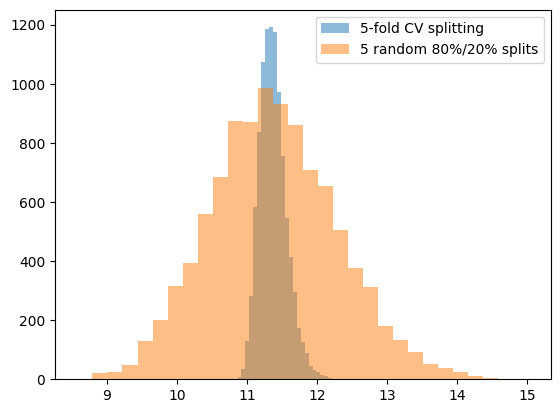

In [403]:
plt.hist(cv_mses.mean(axis=1), alpha=0.5, bins=30, label="5-fold CV splitting")
plt.hist(naive_mses.mean(axis=1), alpha=0.5, bins=30, label="5 random 80%/20% splits")
plt.legend()

In [410]:
from sklearn.model_selection import KFold

n_splits = 100
n_repeats = 1000
naive_mses = np.zeros((n_repeats, n_splits))

model = LinearRegression()

for i in range(n_repeats):
    for j in range(n_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=78)
        model.fit(X_train, y_train)
        assert len(X_test) == 78
        naive_mses[i, j] = mean_squared_error(y_test, model.predict(X_test))

In [411]:
print(naive_mses.mean(axis=1).mean())
print(naive_mses.mean(axis=1).std())

11.373091982100686
0.2045745820581938


In [416]:
from sklearn.model_selection import KFold

n_repeats = 200
means = []
stds = []

for n_splits in np.arange(10, 160, 10):
    mses = np.zeros((n_repeats, n_splits))

    model = LinearRegression()

    for i in range(n_repeats):
        for j in range(n_splits):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=78)
            model.fit(X_train, y_train)
            assert len(X_test) == 78
            mses[i, j] = mean_squared_error(y_test, model.predict(X_test))
    mean = mses.mean(axis=1).mean()
    std = mses.mean(axis=1).std()
    means.append(mean)
    stds.append(std)

    print(f"n_splits = {n_splits}, mean = {mean:.2f}, std = {std:.3f}")

n_splits = 10, mean = 11.35, std = 0.616
n_splits = 20, mean = 11.34, std = 0.405
n_splits = 30, mean = 11.38, std = 0.389
n_splits = 40, mean = 11.33, std = 0.336
n_splits = 50, mean = 11.36, std = 0.294
n_splits = 60, mean = 11.38, std = 0.249
n_splits = 70, mean = 11.34, std = 0.258
n_splits = 80, mean = 11.41, std = 0.240
n_splits = 90, mean = 11.36, std = 0.221
n_splits = 100, mean = 11.37, std = 0.199
n_splits = 110, mean = 11.38, std = 0.197
n_splits = 120, mean = 11.36, std = 0.187
n_splits = 130, mean = 11.36, std = 0.180
n_splits = 140, mean = 11.38, std = 0.187
n_splits = 150, mean = 11.40, std = 0.161


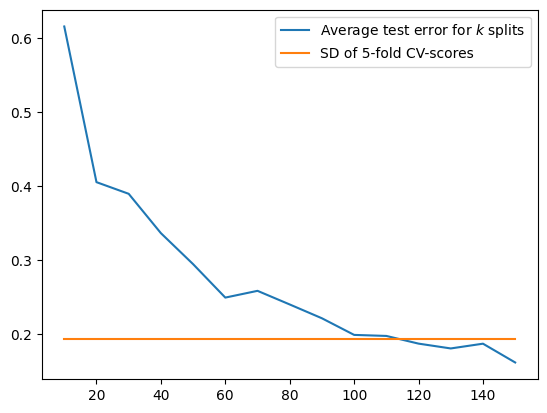

In [422]:
cv_std = cv_mses.mean(axis=1).std()
plt.plot(np.arange(10, 160, 10), stds, label="Average test error for $k$ splits")
plt.plot([10, 150], [cv_std, cv_std], label="SD of 5-fold CV-scores")
plt.legend()
plt.show()

### Cross-validation: Why bother?

To understand the benefit cross-validation brings to data analysis, we need to articulate precisely which error quantity the cross-validation estimates, i.e., what is the *estimand* of the cross-validation error estimator.

Here, the fundamental notion of a $n$-learner is key. 

#### The setting; some statistical learning jargon

- Let $\mathcal{X}=\mathbb{R}^p$ and $\mathcal{Y}=\mathbb{R}$. Call $\mathcal{X}$ the *feature space* and $\mathcal{Y}$ the *target space*.

- A *prediction rule* (a *hypothesis* in the statistical learning jargon) is a function
  
  $$h:\mathcal{X}\to\mathcal{Y}.$$

- Let $\mathcal{H}$ be a set of prediction rules (a *hypothesis space* in the statistical learning jargon).

##### Definition: $n$-learner

An $n$-learner $L_n$ is a function
$$
L_n:(\mathcal{X}\times\mathcal{Y})^n\longrightarrow \mathcal{H}.
$$

A $n$-learner is a function that takes, as input, a *training set* $D=\{(\mathbf{x}_i, y_i)\}$ of size $n$ and produces, as output, a predition rule $h=L_n(D)$.

Let $p(\mathbf{x},y)$ be a joint distribution on $\mathcal{X}\times\mathcal{Y}$ &mdash; our *data-generating distribution*.

Write $p^{\otimes n}$ for the distribution on $(\mathcal{X}\times\mathcal{Y})^n$ whose samples $D=\{(\mathbf{x}_i, y_i)\}$ are IID samples of size $n$ drawn from $p$.

##### Definition: predictive error

The *predictive (mean squared) error of $L_n$ for $p$*, denoted $E(L_n, p)$, is defined by
$$
E(L_n, p) = \mathbb{E}\left[\big(y - L_n(D)(\mathbf{x})\big)^2\right],
$$
where the expected value is with respect to independent training sets $D\sim p^{\otimes n}$ and test points $(\mathbf{x}, y)\sim p$.

##### Estimating $E(L_n, p)$

By the law of total expectation,
$$
E(L_n, p) = \mathbb{E}_{D\sim p^{\otimes n}}\left[
    \mathbb{E}_{(\mathbf{x}, y)\sim p}\left[\big(y - L_n(D)(\mathbf{x})\big)^2
    \mid D\right]
\right]\tag{\dag}
$$

Given a test set $D^*=\{(\mathbf{x}_j,y_j)\}$ of size $m$ drawn, independent of $D$, we can approximate the inner conditional expectation the average:
$$
\mathbb{E}_{(\mathbf{x}, y)\sim p}\left[\big(y - L_n(D)(\mathbf{x})\big)^2
    \mid D\right]\approx E(L_n, p\mid D, D^*),
$$
where
$$
E(L_n, p\mid D, D^*) = \frac1m\sum_{j < m}\big(y_j - L_n(D)(\mathbf{x}_j)\big)^2
$$

We can also estimate the outer expectation in $(\dag)$ by an average: If
$\{(D_i, D_i^*)\}$ are $k$ independent pairs of independent training and testing sets with sizes $n$ and $m$, respectively, then
$$
E(L_n, p) \approx \frac1k\sum_{i < k}E(L_n, p\mid D_i, D_i^*).
$$

#### The linear regression learner

An element of $(\mathcal{X}\times\mathcal{Y})^n$ is nothing more than a pair $(\mathbf{X}, \mathbf{y})$ of a $\mathbf{X}$ of shape $(n, p)$ and a vector $\mathbf{y}$ of shape $(n,)$.

Define the *linear regression $n$-learner* $\operatorname{LR}_n$ by
$$
\operatorname{LR}_n(\mathbf{X},\mathbf{y})(\mathbf{x}) = \mathbf{x}^T((\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}).
$$

In [ ]:
def LR(n, X, y):
    assert n == len(X) and n == len(y)
    model = LinearRegression()
    model.fit(X, y)

    def LRnXy(x):
        return model.predict(x)

    return LRnXy

In [ ]:
n = 400
p = 10
sigma = 1.0

for k in range(20):
    rng = np.random.default_rng()
    beta = rng.normal(size=p)

    def make_data(n):
        X = rng.normal(size=(n, p))
        y = X @ beta + sigma * rng.normal(size=n)
        return X, y

    n_repeats = 2000
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True)

    kfold_mses = np.zeros((n_repeats, n_splits))
    tts_mses = np.zeros((n_repeats, n_splits))
    model = LinearRegression()
    for i in range(n_repeats):
        X, y = make_data(n)
        assert len(X) == n
        assert len(y) == n
        for j, (train, test) in enumerate(kfold.split(X)):
            assert len(train) == 320
            assert len(test) == 80
            model.fit(X[train], y[train])
            kfold_mses[i, j] = mean_squared_error(y[test], model.predict(X[test]))

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80)
            assert len(X_train) == 320
            assert len(X_test) == 80
            model.fit(X_train, y_train)
            tts_mses[i, j] = mean_squared_error(y_test, model.predict(X_test))

    print(
        "kfold",
        "mean",
        kfold_mses.mean(axis=1).mean(),
        "std",
        kfold_mses.mean(axis=1).std(),
    )
    print(
        "tts", "mean", tts_mses.mean(axis=1).mean(), "std", tts_mses.mean(axis=1).std()
    )
    print()

kfold mean 1.032755340597521 std 0.0764294829764542
kfold mean 1.031175259050327 std 0.09910718510953809

kfold mean 1.035999764835223 std 0.07726068957938675
kfold mean 1.0358974757921426 std 0.10103534212992638

kfold mean 1.0360297091122743 std 0.07550163744566397
kfold mean 1.0350009730215726 std 0.09857488069949362

kfold mean 1.033408318485178 std 0.07627179858488713
kfold mean 1.0346336998792869 std 0.10085629437887865

kfold mean 1.0343378462385089 std 0.07604545562934355
kfold mean 1.0350604691421794 std 0.0992332594703915

kfold mean 1.0343254532013966 std 0.07552670722115765
kfold mean 1.0332090330935868 std 0.09925416959028627

kfold mean 1.0354049222688846 std 0.07596152656172234
kfold mean 1.0344631291375885 std 0.10081896602674165

kfold mean 1.0399424387121128 std 0.07801029863548845
kfold mean 1.0404493355558218 std 0.10050246888745318

kfold mean 1.0340630014890329 std 0.0759357742542351
kfold mean 1.035180646693926 std 0.09852361463931732

kfold mean 1.03694909631523

In [ ]:
n = 400
p = 10
sigma = 1.0

for k in range(20):
    rng = np.random.default_rng()
    beta = rng.normal(size=p)

    def make_data(n):
        X = rng.normal(size=(n, p))
        y = X @ beta + sigma * rng.normal(size=n)
        return X, y

    X, y = make_data(n)
    assert len(X) == n
    assert len(y) == n

    n_repeats = 2000
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True)

    kfold_mses = np.zeros((n_repeats, n_splits))
    tts_mses = np.zeros((n_repeats, n_splits))
    model = LinearRegression()
    for i in range(n_repeats):
        for j, (train, test) in enumerate(kfold.split(X)):
            assert len(train) == 320
            assert len(test) == 80
            model.fit(X[train], y[train])
            kfold_mses[i, j] = mean_squared_error(y[test], model.predict(X[test]))

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80)
            assert len(X_train) == 320
            assert len(X_test) == 80
            model.fit(X_train, y_train)
            tts_mses[i, j] = mean_squared_error(y_test, model.predict(X_test))

    print(k)
    print(
        "kfold",
        "mean",
        kfold_mses.mean(axis=1).mean(),
        "std",
        kfold_mses.mean(axis=1).std(),
    )
    print(
        "tts", "mean", tts_mses.mean(axis=1).mean(), "std", tts_mses.mean(axis=1).std()
    )
    print()

0
kfold mean 1.0670741597347906 std 0.014118213780166032
tts mean 1.0657763002537604 std 0.06563802074818469

1
kfold mean 1.0971597044362515 std 0.014243233294910293
tts mean 1.0959358396490815 std 0.0621683596495786

2
kfold mean 0.9925613053221234 std 0.01327820263862745
tts mean 0.9906738694106146 std 0.06265579970359617

3
kfold mean 1.105379059861051 std 0.015153122731961052
tts mean 1.1050888332690323 std 0.07200032082506719

4
kfold mean 1.053691412990474 std 0.013627393215964196
tts mean 1.054160972727525 std 0.0667131179082404

5
kfold mean 0.9948318314681864 std 0.012181677867287823
tts mean 0.9939712967904724 std 0.05861726300791098

6
kfold mean 1.0480812838164804 std 0.014097905984458953
tts mean 1.0496623743563105 std 0.0645519523702767

7
kfold mean 1.1476347825783286 std 0.01551892246581672
tts mean 1.1493882455448257 std 0.07397334464793799

8
kfold mean 1.0433498570049846 std 0.013769609123727614
tts mean 1.0446050500861064 std 0.06417028665983496

9
kfold mean 0.944

In [446]:
df

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
385,390,36.0,4,135.0,84.0,2370,13.0,82,1,dodge charger 2.2
386,391,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro
387,392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
388,393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
